# 1. Tools for text processing

We'll check which words are used the most in Herman Melville's Moby Dick and how often.

We'll get the novel from Project Gutenberg using Python's requests.
with the Natural Language Toolkit (nltk)

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

#2. Request Moby Dick

HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

In [2]:
r= requests.get("https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm")

r.encoding = 'utf-8'

html = r.text

html[:2000]

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-se

# 3. Get the text from the HTML

 For this we'll use the package BeautifulSoup


In [3]:
soup = BeautifulSoup(html,"lxml")

text = soup.get_text()

text[32000:34000]


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


't me\r\n      from deliberately stepping into the street, and methodically knocking\r\n      people’s hats off—then, I account it high time to get to sea as soon\r\n      as I can. This is my substitute for pistol and ball. With a philosophical\r\n      flourish Cato throws himself upon his sword; I quietly take to the ship.\r\n      There is nothing surprising in this. If they but knew it, almost all men\r\n      in their degree, some time or other, cherish very nearly the same feelings\r\n      towards the ocean with me.\r\n    \n\r\n      There now is your insular city of the Manhattoes, belted round by wharves\r\n      as Indian isles by coral reefs—commerce surrounds it with her surf.\r\n      Right and left, the streets take you waterward. Its extreme downtown is\r\n      the battery, where that noble mole is washed by waves, and cooled by\r\n      breezes, which a few hours previous were out of sight of land. Look at the\r\n      crowds of water-gazers there.\r\n    \n\r\n     

# 4. Extract the words

For how to use the nltk.tokenize.RegexpTokenizer function, please see the example in [the nltk documentation.](https://www.nltk.org/api/nltk.tokenize.html?highlight=regexp#module-nltk.tokenize.regexp)



In [4]:
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='\w+')

tokens = tokenizer.tokenize(text=text)

tokens[:10]

['Moby',
 'Dick',
 'Or',
 'the',
 'Whale',
 'by',
 'Herman',
 'Melville',
 'The',
 'Project']

#5. Make the words lowercase

In [5]:
words = [token.lower() for token in tokens]

# Printing out the first 8 words / tokens
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

#6. Load in stop words

People often take out common English words like 'the,' 'of,' and 'a' because they're not very interesting. These words are called stop words. The nltk package has a helpful list of stop words in English that we can use.







In [6]:
#get stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
sw = nltk.corpus.stopwords.words('english')


In [9]:
sw[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

# 7. Remove stop words in Moby Dick

We want to make a list of words from Moby Dick, but without using certain common words (stop words). To do this, we'll go through each word in the original list and add it to a new list only if it's not a stop word.







In [10]:
words_ns = [word for word in words if word not in sw]

words_ns[:5]



['moby', 'dick', 'whale', 'herman', 'melville']

#8. We have the answer

Our original question was:

What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

We are now ready to answer that! Let's create a word frequency distribution plot using nltk.

See the nltk documentation for how to use nltk.FreqDist()


In [11]:
%matplotlib inline

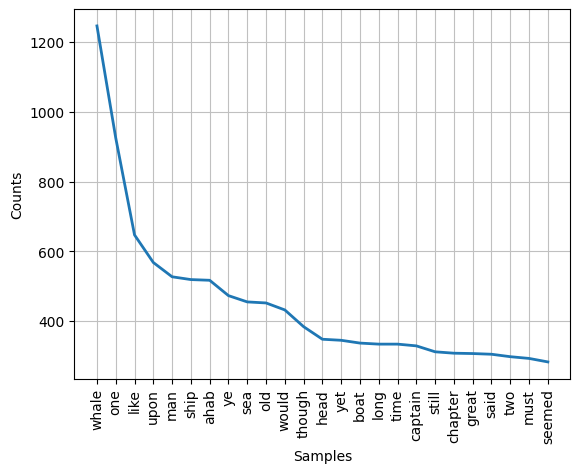

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
freqdist = nltk.FreqDist(words_ns)

freqdist.plot(25)

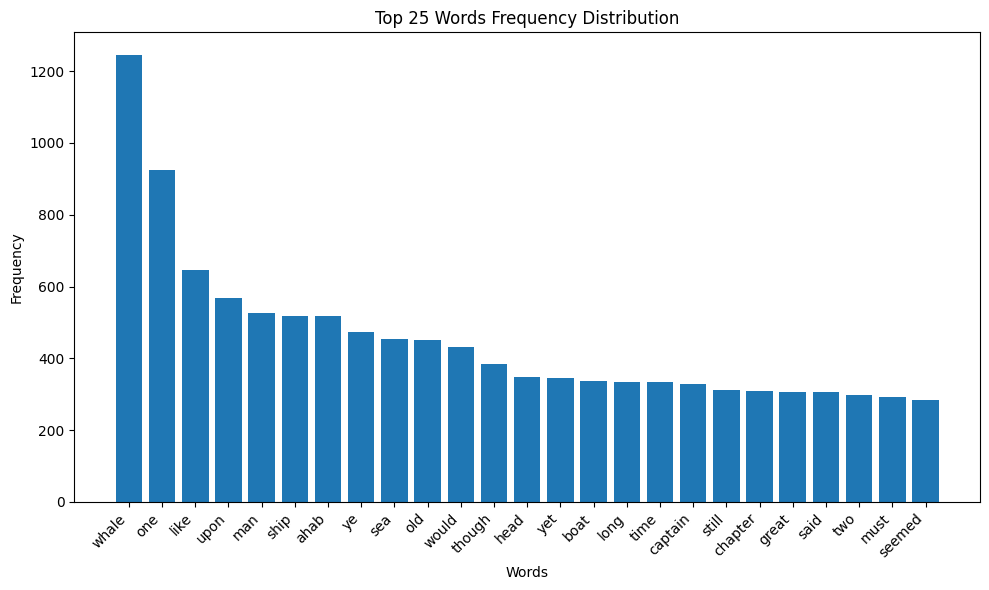

The most common word is 'whale' with a frequency of 1246.


In [15]:
import matplotlib.pyplot as plt

freqdist = nltk.FreqDist(words_ns)

top_words = freqdist.most_common(25)

words, frequencies = zip(*top_words)

most_common_word, most_common_frequency = freqdist.most_common(1)[0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 Words Frequency Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

print(f"The most common word is '{most_common_word}' with a frequency of {most_common_frequency}.")
